# Book Recommender System
### Project Topic
#### Citation
For this project I chose to create a book recommender system. I am using the [Book Recommender System](https://www.kaggle.com/datasets/rxsraghavagrawal/book-recommender-system/data) dataset from Kaggle: <br>
> RAGHAV AGRAWAL. Book Recommender System. Retrieved June 24, 2024 from (https://www.kaggle.com/datasets/rxsraghavagrawal/book-recommender-system/data).
>
#### Github Repo
The code for this project can be found on this GitHub page: (https://github.com/mymir/Book_Recommender)
#### Problem Statement
The goal for this project is to create an unsupervised learning model that can reccomend books to users based on their previous ratings. With the ever growing selection of books available, it can be hard for readers to choose what to read next. Recommender systems make it easier for people to filter out books they wouldn't like and find new favorites.<br>
#### Type of Algorithm
Unsupervised learning methods are a good fit for recommender systems. Furthermore, for this project I think clustering methods would produce the best results. Similar books and similar users can be clustered together to make more accuracte predictions.

## Load Data
The data comes in three csv files. Load each into their own pandas dataframe.

In [1]:
import pandas as pd
import seaborn as sb
from seaborn import objects as so
import numpy as np
from scipy.sparse import coo_matrix, csr_matrix
from sklearn.cluster import KMeans, BisectingKMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [2]:
users = pd.read_csv('data/BX-Users.csv', encoding='latin-1', sep=';', on_bad_lines='skip')
books = pd.read_csv('data/BX-Books.csv', encoding='latin-1', sep=';', on_bad_lines='skip', low_memory=False)
ratings = pd.read_csv('data/BX-Book-Ratings.csv', encoding='latin-1', sep=';', on_bad_lines='skip')

## Data Overview
Look into the size of each dataframe, the number of features they each have, and the datatype of each feature.

### Book Features
The books dataframe has 8 columns, each with the Dtype: object. It contains 271360 entries.

In [3]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [4]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


### User Features
The users dataframe has 3 columns with the Dtypes: int64 for id, object for the location, and float64 for the age. It contains 278858 entries.

In [5]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [6]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### Rating Features
The ratings dataframe has 3 columns with the Dtypes: int64 for User-id, object for the ISBN, and int64 for the rating. It contains 1149780 entries.

The ratings are out of 10.

In [7]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [8]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [9]:
max_rating = ratings['Book-Rating'].max()
min_rating = ratings['Book-Rating'].min()

print(f'Rating scale: {min_rating} to {max_rating}')

Rating scale: 0 to 10


## Data Cleaning and Analysis
Since this dataset needs extensive cleaning, it would be best to prefrom the cleaning before further analysis and visualization.

### Drop images
Drop the image columns from the books dataframe. Since the images are stored as url's it would be difficult to download each image to use for this project. Furthermore, since the focus is on similarily rated books, we won't lose too much data if we ignore the images.

In [10]:
books = books.drop(['Image-URL-S','Image-URL-M','Image-URL-L'], axis=1)
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
dtypes: object(5)
memory usage: 10.4+ MB


### Update Dtypes
Update the Year-Of-Publication to an int value and shorten the name. First, since there were issues reading the data, list out the unique values so dirty rows can be dropped. 

In [11]:
print(books['Year-Of-Publication'].unique())

['2002' '2001' '1991' '1999' '2000' '1993' '1996' '1988' '2004' '1998'
 '1994' '2003' '1997' '1983' '1979' '1995' '1982' '1985' '1992' '1986'
 '1978' '1980' '1952' '1987' '1990' '1981' '1989' '1984' '0' '1968' '1961'
 '1958' '1974' '1976' '1971' '1977' '1975' '1965' '1941' '1970' '1962'
 '1973' '1972' '1960' '1966' '1920' '1956' '1959' '1953' '1951' '1942'
 '1963' '1964' '1969' '1954' '1950' '1967' '2005' '1957' '1940' '1937'
 '1955' '1946' '1936' '1930' '2011' '1925' '1948' '1943' '1947' '1945'
 '1923' '2020' '1939' '1926' '1938' '2030' '1911' '1904' '1949' '1932'
 '1928' '1929' '1927' '1931' '1914' '2050' '1934' '1910' '1933' '1902'
 '1924' '1921' '1900' '2038' '2026' '1944' '1917' '1901' '2010' '1908'
 '1906' '1935' '1806' '2021' '2012' '2006' 'DK Publishing Inc' 'Gallimard'
 '1909' '2008' '1378' '1919' '1922' '1897' '2024' '1376' '2037']


### Drop Outliers
Drop the rows that contain the name of the publisher instead of the year. Also drop rows that contain outliers like Year-Of-Publication = 0.

In [12]:
# Drop bad rows
books = books[~books['Year-Of-Publication'].isin(['Gallimard', 'DK Publishing Inc', '0'])]

# Rename features
books = books.rename(columns={'ISBN': 'Book_ID', 'Year-Of-Publication': 'Year', 'Book-Title': 'Title', 'Book-Author': 'Author'})
print(books['Year'].unique())

['2002' '2001' '1991' '1999' '2000' '1993' '1996' '1988' '2004' '1998'
 '1994' '2003' '1997' '1983' '1979' '1995' '1982' '1985' '1992' '1986'
 '1978' '1980' '1952' '1987' '1990' '1981' '1989' '1984' '1968' '1961'
 '1958' '1974' '1976' '1971' '1977' '1975' '1965' '1941' '1970' '1962'
 '1973' '1972' '1960' '1966' '1920' '1956' '1959' '1953' '1951' '1942'
 '1963' '1964' '1969' '1954' '1950' '1967' '2005' '1957' '1940' '1937'
 '1955' '1946' '1936' '1930' '2011' '1925' '1948' '1943' '1947' '1945'
 '1923' '2020' '1939' '1926' '1938' '2030' '1911' '1904' '1949' '1932'
 '1928' '1929' '1927' '1931' '1914' '2050' '1934' '1910' '1933' '1902'
 '1924' '1921' '1900' '2038' '2026' '1944' '1917' '1901' '2010' '1908'
 '1906' '1935' '1806' '2021' '2012' '2006' '1909' '2008' '1378' '1919'
 '1922' '1897' '2024' '1376' '2037']


In [13]:
# Update datatype
books['Year'] = books['Year'].astype('int64')
books.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266739 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Book_ID    266739 non-null  object
 1   Title      266739 non-null  object
 2   Author     266737 non-null  object
 3   Year       266739 non-null  int64 
 4   Publisher  266737 non-null  object
dtypes: int64(1), object(4)
memory usage: 12.2+ MB


In [14]:
max_year = books['Year'].max()
min_year = books['Year'].min()

print(f'Year range: {min_year} to {max_year}')

Year range: 1376 to 2050


In [15]:
# This project is being completed in 2024 so any year after 2024 is an outlier
final_outliers = [i for i in range(2025, 2051)]

# Drop bad rows
books = books[~books['Year'].isin(final_outliers)]

max_year = books['Year'].max()
min_year = books['Year'].min()

print(f'Year range: {min_year} to {max_year}')

Year range: 1376 to 2024


### Update Users and Ratings
Update ratings to reflect changes.

In [16]:
## Change column to match books
ratings = ratings.rename(columns={'ISBN': 'Book_ID', 'Book-Rating': 'Rating', 'User-ID': 'User_ID'})
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   User_ID  1149780 non-null  int64 
 1   Book_ID  1149780 non-null  object
 2   Rating   1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


### Drop null values
The books and users dataframes both contain null values.

#### Books
For books, since there are only 2 null values in author and 2 in publisher, it would be best to just drop those rows.

In [17]:
books.isnull().sum()

Book_ID      0
Title        0
Author       2
Year         0
Publisher    2
dtype: int64

In [18]:
books = books[books['Author'].notna()]
books = books[books['Publisher'].notna()]
books.isnull().sum()

Book_ID      0
Title        0
Author       0
Year         0
Publisher    0
dtype: int64

#### Users
Since there are 110762 null values in age too much data would be lost dropping those rows. Instead it makes for sense to drop the column.

In [19]:
users = users.rename(columns={'User-ID': 'User_ID'})
users.isnull().sum()

User_ID          0
Location         0
Age         110762
dtype: int64

In [20]:
users = users.drop(['Age'],axis=1)
users.isnull().sum()

User_ID     0
Location    0
dtype: int64

In [21]:
ratings.isnull().sum()

User_ID    0
Book_ID    0
Rating     0
dtype: int64

In [22]:
# Drop missing books from ratings
ratings = ratings[ratings['Book_ID'].isin(books['Book_ID'].unique())]
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1017066 entries, 0 to 1149778
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   User_ID  1017066 non-null  int64 
 1   Book_ID  1017066 non-null  object
 2   Rating   1017066 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 31.0+ MB


### Remove Inactive Users
Remove users who have rated less than 5 books

In [23]:
user_ratings = ratings['User_ID'].value_counts() > 10
user_ids = user_ratings[user_ratings].index
user_ids = user_ids.unique()

In [24]:
users = users[users['User_ID'].isin(user_ids)]
users.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10718 entries, 7 to 278850
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_ID   10718 non-null  int64 
 1   Location  10718 non-null  object
dtypes: int64(1), object(1)
memory usage: 251.2+ KB


In [25]:
ratings = ratings[ratings['User_ID'].isin(users['User_ID'])] 

## Correlation
There will likely be a correlation between the number of books a user has rated and that user's average rating. For example some users might only rate books they enjoy, so their rating list will be smaller while containing a high number of positive values. This can be visualized using a pairplot.

In [26]:
ave_ratings = []
zeros = []
aves = []

for usr in user_ids:
    usr_ratings = ratings[ratings['User_ID'].isin([usr])]
    usr_ratings = usr_ratings[usr_ratings['Rating'] > 0]['Rating'].tolist()
    ave = sum(usr_ratings)/len(usr_ratings) if len(usr_ratings) > 0 else 0
    if ave > 0:
        ave_ratings.append(usr_ratings)
        aves.append(sum(usr_ratings)/len(usr_ratings) if len(usr_ratings) > 0 else 0)
    else:
        zeros.append(usr)

In [27]:
users = users[~users['User_ID'].isin(zeros)]
ratings = ratings[~ratings['User_ID'].isin(zeros)] 

In [28]:
users['Average'] = aves
users = users[users['Average'] != 0.0]
print(ratings['Rating'].min())

users.head()

0


,User_ID,Location,Average
7,8,"timmins, ontario, canada",7.361103
98,99,"franktown, colorado, usa",7.235294
241,242,"neuffen, baden-wuerttemberg, germany",8.666667
242,243,"arden hills, minnesota, usa",8.862190
253,254,"minneapolis, minnesota, usa",7.565445


In [29]:
frequency = [len(i) for i in ave_ratings]
rating_frequency = pd.DataFrame()
rating_frequency['Frequency'] = frequency
rating_frequency['Rating'] = users['Average'].tolist()

rating_frequency.head()

,Frequency,Rating
0,6782,7.361103
1,17,7.235294
2,1833,8.666667
3,5689,8.862190
4,764,7.565445


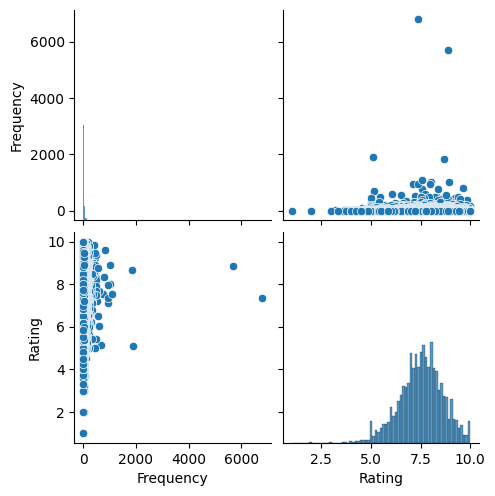

In [30]:
sb.pairplot(rating_frequency)

#### Correlation Result
Looking at the pair plot, it is clear that there is a correlation between the number of books a user has rated and the user's average rating.

## Data Visualization And Transformation
Use plots to show the distribution of the different features. These plots will help determine how to scale the data, and what data can be removed.

### Rating distribution
Plot the rating distribution

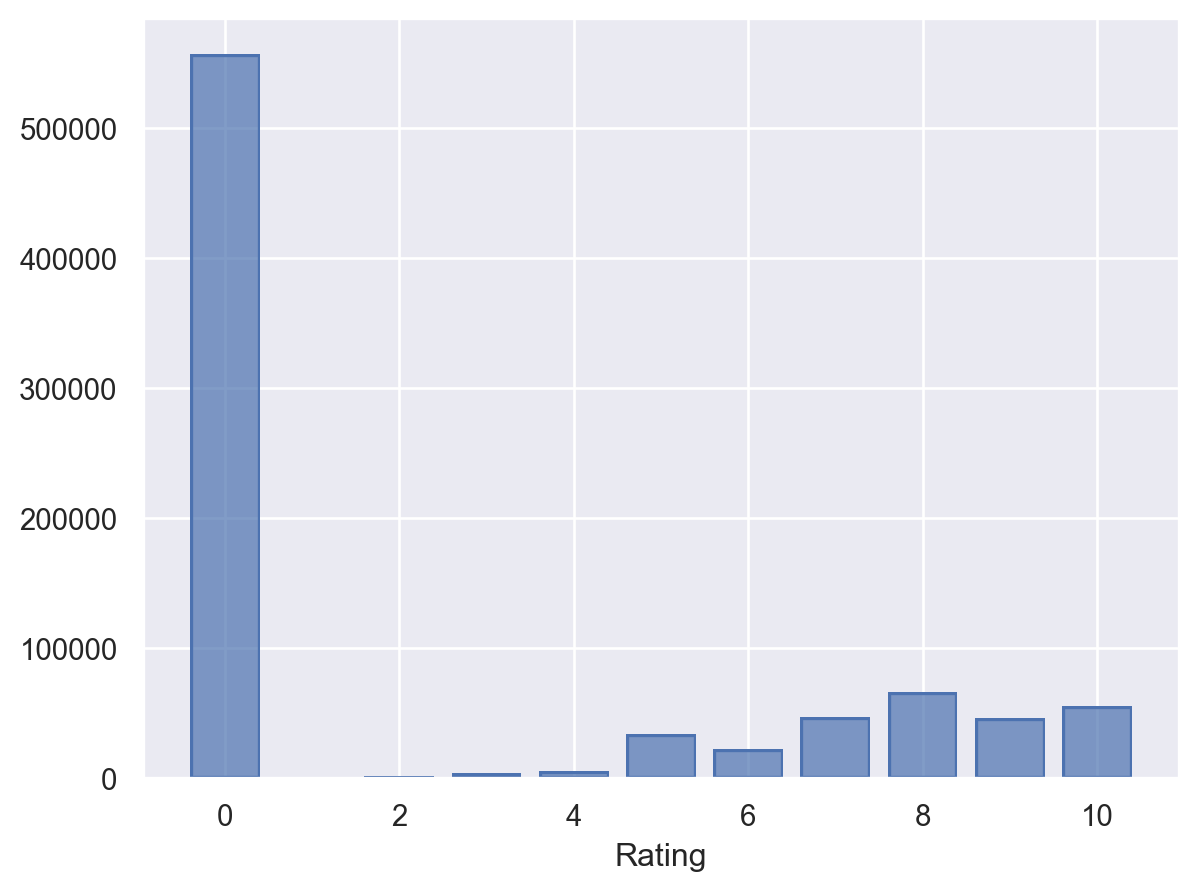

In [31]:
so.Plot(ratings, "Rating").add(so.Bar(), so.Hist(binwidth=1, discrete=True))

#### Zero Values
Looking at the difference between the number of zero ratings compared to the rest, it is safe to assume zero stands for books that were not rated by a user. 

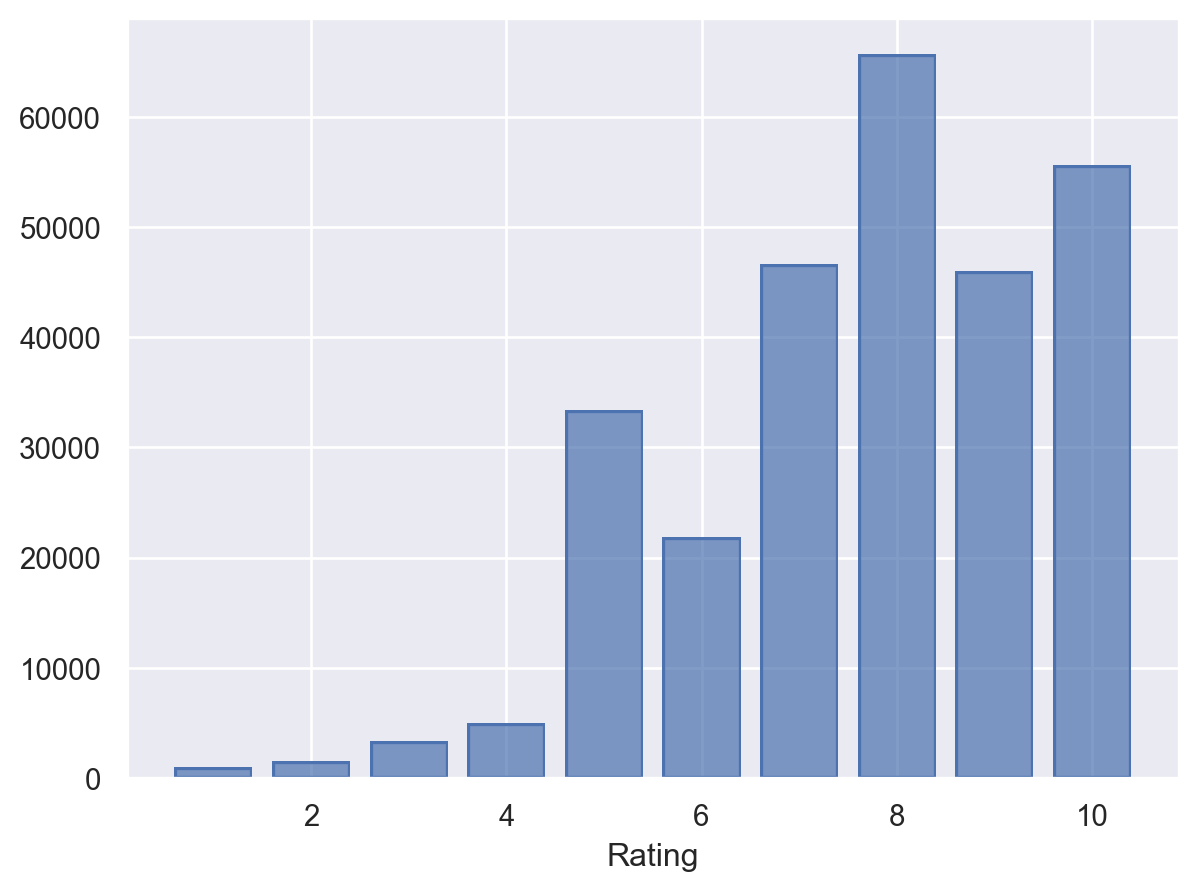

In [32]:
non_zero_ratings = ratings[~ratings['Rating'].isin([0])]
so.Plot(non_zero_ratings, "Rating").add(so.Bar(), so.Hist(binwidth=1, discrete=True))

### Year Distribution
Plot the rating distribution

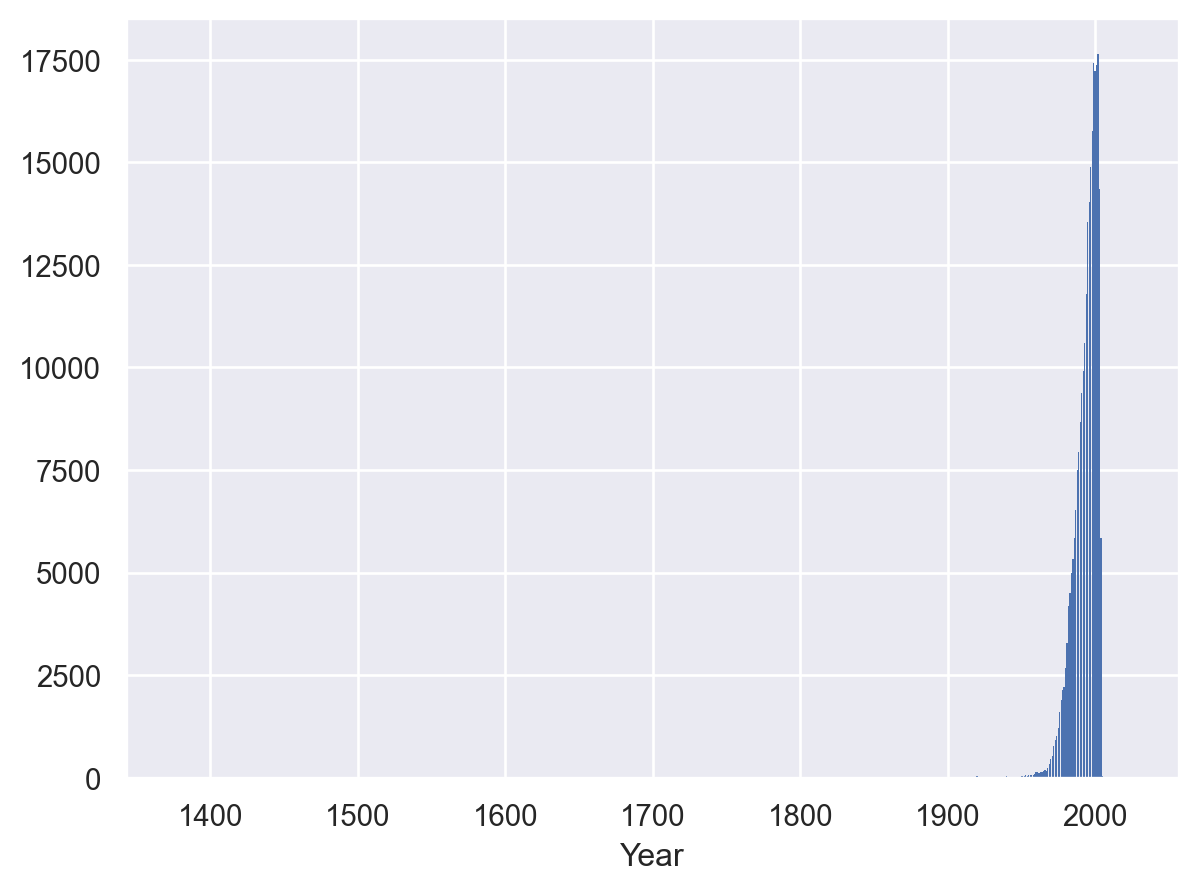

In [33]:
so.Plot(books, "Year").add(so.Bar(), so.Hist(binwidth=1, discrete=True))

#### After 1900
Create another plot for the range 1900 to 2025 since the vast majority of books were published in that time period.

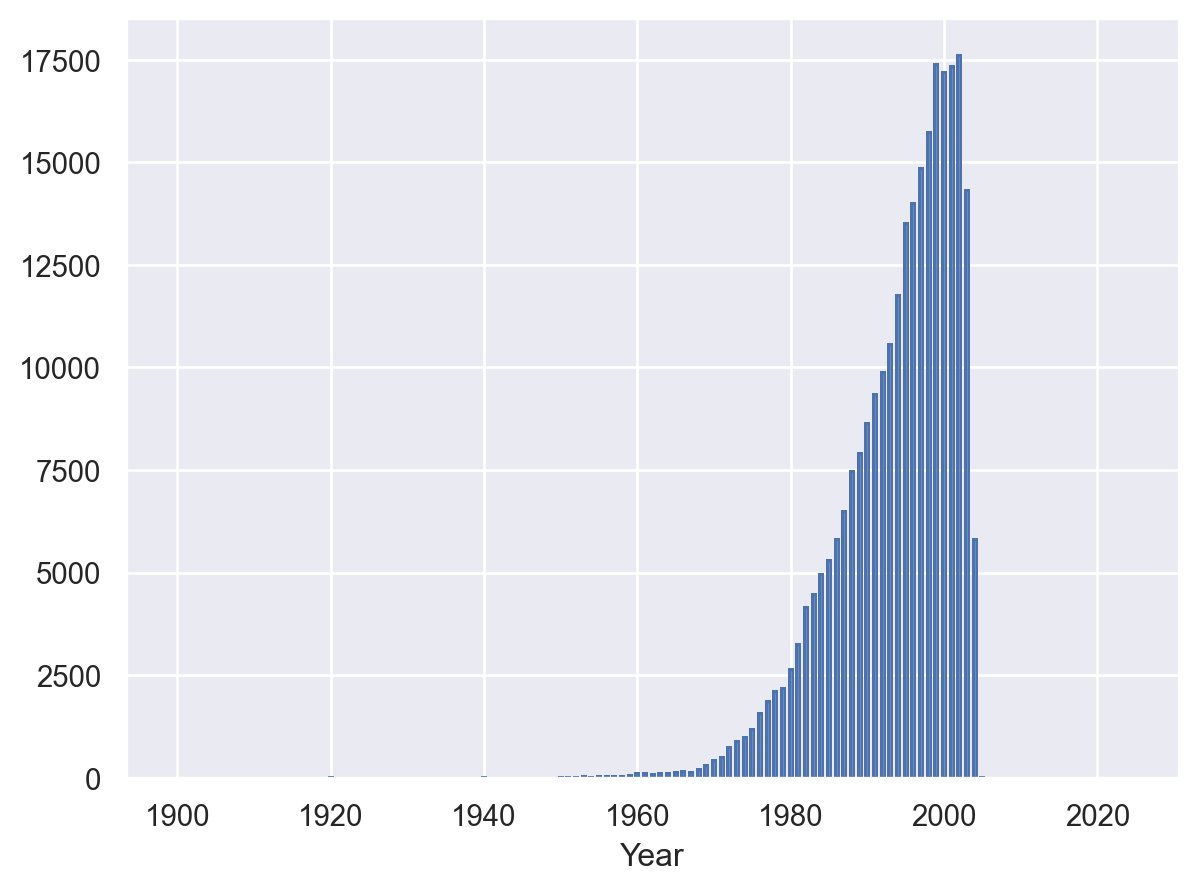

In [34]:
years_compact = books[books['Year'].isin([i for i in range(1900,2025)])]
so.Plot(years_compact, "Year").add(so.Bar(), so.Hist(binwidth=1, discrete=True))

### Publisher Distribution
Plot the publisher distribution. First get a snapshot of what the different publisher values are since the number of publishers is so large. Looking at the results, it is clear that some publishers are actually the same, just with different capitalization or punctuation.

In [35]:
pubs = books['Publisher'].unique()
print('Unique publishers: ',len(pubs))

Unique publishers:  16393


In [36]:
pubs.sort()
pubs[:50]

array([' Editions P. Terrail', ' Tri-State Press', "'K' Pub",
       '(3 Queen Sq., WC1N 3AU), Faber and Faber Ltd',
       '(49 Poland St., W.1), BPC Unit 75', '10-18', '10/18', '10/18 UGE',
       '10/18 Uge', '1001 nuits', '101 Productions',
       '101 Productions; [distributed by Scribner, New York]',
       '101 Productions; distributed by Scribner, New York',
       '10K Gold Promotions', '10x18', '11/9 Publishing',
       '1stBooks Library', '2 13 61', '2.13.61 Publications', '219 Press',
       '21st Century', '21st Century Information', '21st Century Press',
       '21st Century Publications', '22/7 Publishing Company',
       '22nd. Century, New York', '29th Street Press',
       '2nd Avenue Publishing, Inc.', '3', '3 S Fitness Group Ltd',
       '30 Day Gourmet Press', '300Incredible.com', '300incredible.com',
       '37547', '3D Press', '3H Productions, Inc.', '3f Publications',
       '3rd Bed', '3rd Woman Press', '5 Star Publications',
       '7 i Mig Editorial', '7 i Mi

In [37]:
# Make everything lower case
books['Publisher'] = books['Publisher'].str.lower()

# remove punctuation
processed = []
for pub in books['Publisher']:
    stripped_pub = pub.translate(str.maketrans('','',"@#$%^*<>!ãâ¶©,.Ã?Âª/\?-~();:&[]{}' "))
    stripped_pub = stripped_pub.replace(" ", "")
    processed.append(stripped_pub)

books['Publisher'] = processed

pubs = books['Publisher'].unique()
print('Unique publishers: ',len(pubs))
print('Number of books: ',len(books))

Unique publishers:  15722
Number of books:  266723


In [38]:
pubs.sort()
pubs[:50]

array(['1001nuits', '1018', '1018uge', '101productions',
       '101productionsdistributedbyscribnernewyork', '10kgoldpromotions',
       '10x18', '119publishing', '1stbookslibrary', '21361',
       '21361publications', '219press', '21stcentury',
       '21stcenturyinformation', '21stcenturypress',
       '21stcenturypublications', '227publishingcompany',
       '22ndcenturynewyork', '29thstreetpress', '2ndavenuepublishinginc',
       '3', '300incrediblecom', '30daygourmetpress', '37547', '3dpress',
       '3fpublications', '3hproductionsinc',
       '3queensqwc1n3aufaberandfaberltd', '3rdbed', '3rdwomanpress',
       '3sfitnessgroupltd', '49polandstw1bpcunit75', '5starpublications',
       '7imigeditorial', '7imigeditorialdepoesia', 'aaa', 'aaaipress',
       'aaaroadatlas', 'aahhabooksinc', 'aaknopf', 'aalidabookpublishers',
       'aampafarmar', 'aampbbookdistinc', 'aampbdistributors',
       'aampbpublishersgroup', 'aampcblack', 'aampcblackltd',
       'aampcblackpublishersltd', 'a

#### Updated Publishers
This only reduced the list by 671 entries, so the data is still to big to plot in a single graph. Instead examine the range of the frequency of the different publishers. Looking at the results, 

In [39]:
pub_names = []
pub_count = []

for pub in pubs:
    rows = books[books['Publisher'].isin([pub])]
    count = len(rows)
    pub_count.append(count)
    pub_names.append(pub)

pub_df = pd.DataFrame()
pub_df['Name'] = pub_names
pub_df['Count'] = pub_count

In [40]:
pub_df = pub_df.sort_values('Count', ascending=False)
pub_df.head()

,Name,Count
6205,harlequin,7536
12842,silhouette,4220
11093,pocket,3870
1269,ballantinebooks,3764
1303,bantambooks,3644


#### Plot the frequency
Plot the distribution of the frequency of the different publishers. Most publishers only appear in the data set once or twice. This means that Publisher likely will not be a very useful feature and can be dropped.

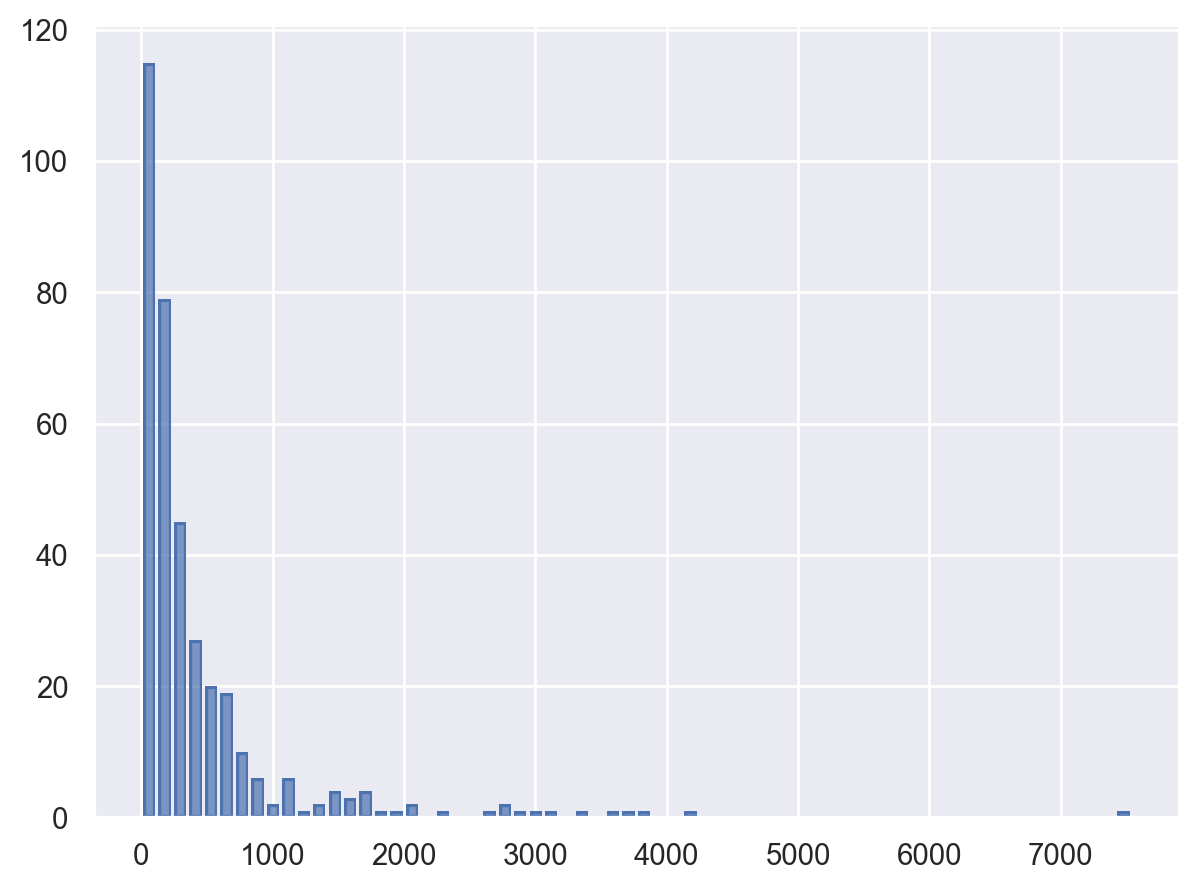

In [41]:
counts = pub_df['Count'].unique()
so.Plot(counts).add(so.Bar(), so.Hist())

In [42]:
books = books.drop(['Publisher'],axis=1)
books.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266723 entries, 0 to 271359
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Book_ID  266723 non-null  object
 1   Title    266723 non-null  object
 2   Author   266723 non-null  object
 3   Year     266723 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 18.2+ MB


#### Author
The same procedure can be done with the Author column. Looking at how many unique athours there are, this likely will not be a useful feature to keep.

In [43]:
auths = books['Author'].unique()
print('Unique Author: ',len(auths))

Unique Author:  100665


In [44]:
# Make everything lower case
books['Author'] = books['Author'].str.lower()

# remove punctuation
processed = []
for auth in books['Author']:
    stripped_auth = auth.translate(str.maketrans('','',"@#$%^*<>!ãâ¶©,.Ã?Âª/\?-~();:&[]{}' "))
    stripped_auth = stripped_auth.replace(" ", "")
    processed.append(stripped_auth)

books['Author'] = processed

auths = books['Author'].unique()
print('Unique Authors: ',len(auths))
print('Number of books: ',len(books))

Unique Authors:  95760
Number of books:  266723


In [45]:
auth_names = []
auth_count = []

for auth in auths:
    rows = books[books['Author'].isin([auth])]
    count = len(rows)
    auth_count.append(count)
    auth_names.append(auth)

auth_df = pd.DataFrame()
auth_df['Name'] = auth_names
auth_df['Count'] = auth_count

In [46]:
auth_df = auth_df.sort_values('Count', ascending=False)
auth_df.head()

,Name,Count
732,agathachristie,602
316,williamshakespeare,565
116,stephenking,521
1762,annmmartin,428
1142,rlstine,423


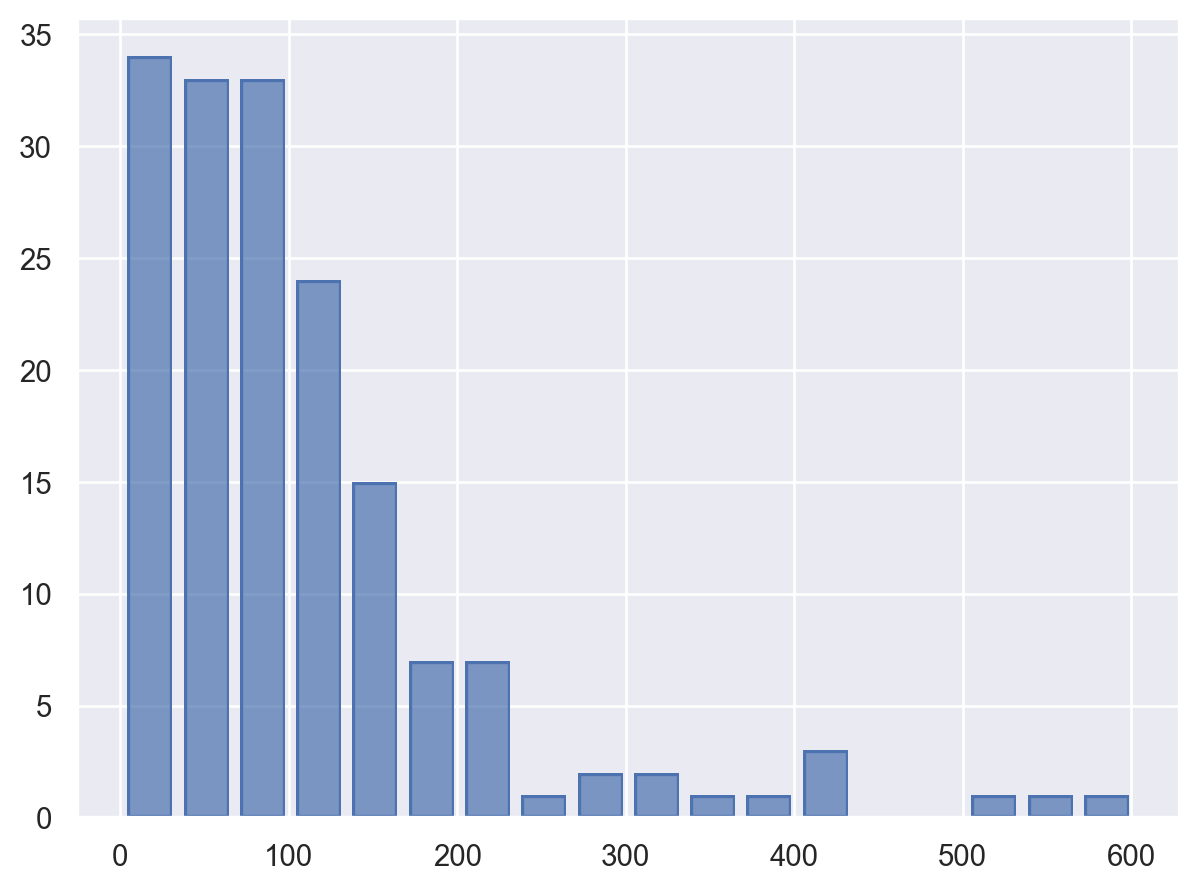

In [47]:
counts = auth_df['Count'].unique()
len(counts)
so.Plot(counts).add(so.Bar(), so.Hist())

In [48]:
books = books.drop(['Author'],axis=1)
books.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266723 entries, 0 to 271359
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Book_ID  266723 non-null  object
 1   Title    266723 non-null  object
 2   Year     266723 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 16.2+ MB


### Title
Since the Book_id feature already takes care of identifying unique books, Title can be dropped.

In [49]:
books = books.drop(['Title'],axis=1)
books.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266723 entries, 0 to 271359
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Book_ID  266723 non-null  object
 1   Year     266723 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 14.2+ MB


### Users
Lastly lets look at the feature Location in users. Since there are so many unique locations it is unlikley they will be useful to include.

In [50]:
locs = users['Location'].unique()
print('Unique Locations: ',len(locs))
print('Number of Users: ',len(users))
users['Location'].head()

Unique Locations:  4802
Number of Users:  10396


7                  timmins, ontario, canada
98                 franktown, colorado, usa
241    neuffen, baden-wuerttemberg, germany
242             arden hills, minnesota, usa
253             minneapolis, minnesota, usa
Name: Location, dtype: object

In [51]:
users = users.drop(['Location'],axis=1)
users.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10396 entries, 7 to 278850
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   User_ID  10396 non-null  int64  
 1   Average  10396 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 243.7 KB


### Rating Matrix
Finally, in order to be able to pass the data into a model, it needs to be grouped together in a rating matrix.

In [52]:
users_train, users_test = train_test_split(users, test_size=0.25, shuffle=True)
books_train, books_test = train_test_split(books, test_size=0.25, shuffle=True)
ratings_train, ratings_test = train_test_split(ratings, test_size=0.25, shuffle=True)

In [53]:
book_ratings = ratings_train.merge(books_train, on='Book_ID')
book_ratings.head()

,User_ID,Book_ID,Rating,Year
0,233445,0452276233,0,1997
1,177458,0806521317,9,2000
2,5899,0380789035,9,2002
3,137589,0380789035,0,2002
4,255078,0380789035,0,2002


In [54]:
user_book_ratings = book_ratings.merge(users_train, on='User_ID')
user_book_ratings = user_book_ratings.drop_duplicates(subset=['Book_ID', 'User_ID'], keep='first')
user_book_ratings.head()

,User_ID,Book_ID,Rating,Year,Average
0,233445,0452276233,0,1997,7.625
1,233445,0380718332,7,1993,7.625
2,233445,0670868361,8,1996,7.625
3,233445,0671793489,0,1993,7.625
4,233445,042516098X,0,1998,7.625


### Trim the dataframe
Currently the dataframe is way to large to use relistically. Drop books that have few ratings and users who have not rated a lot of books.

In [55]:
# Create temp lists to preserve data
temp_list = user_book_ratings

# Remove users with less than 200 ratings
user_ids_temp = temp_list['User_ID'].value_counts() > 200

# Remove books with less than 60 ratings
book_ids_temp = temp_list['Book_ID'].value_counts() > 60

# Make lists of the remaining ids
user_ids = user_ids_temp[user_ids_temp].index
book_ids = book_ids_temp[book_ids_temp].index

# Create a new PD with only the pruned data
temp_list_final = temp_list
temp_list_final = temp_list[user_book_ratings['User_ID'].isin(user_ids)]
temp_list_final = temp_list[user_book_ratings['Book_ID'].isin(book_ids)]

# Compare the shapes
print('Before: ',user_book_ratings.shape)
print('After: ',temp_list_final.shape)
temp_list_final.head()

Before:  (357419, 5)
After:  (33450, 5)


,User_ID,Book_ID,Rating,Year,Average
1,233445,0380718332,7,1993,7.625000
3,233445,0671793489,0,1993,7.625000
4,233445,042516098X,0,1998,7.625000
23,177458,0345353145,7,1988,9.142857
24,177458,0316666343,0,2002,9.142857


In [56]:
allusers = users_train['User_ID'].unique()
allbooks = books_train['Book_ID'].unique()

bid2idx = dict(zip(books_train['Book_ID'],list(range(len(allbooks)))))
uid2idx = dict(zip(users_train['User_ID'],list(range(len(allusers)))))

idx_book = [bid2idx[x] for x in temp_list_final['Book_ID']] 
idx_user = [uid2idx[x] for x in temp_list_final['User_ID']]
rating_train = list(temp_list_final['Rating'])

rating_matrix = coo_matrix((rating_train, (idx_user, idx_book)), shape=(len(allusers), len(allbooks)))

In [57]:
rating_matrix.shape

(7797, 200042)

## Model Building
For this project I am going to focus on clustering methods since they are good at grouping different observations by their similarities.

### KMeans Clustering
My first model will be a KMeans clustering model. Kmeans clustering is a faster, simpler method than other clustering algorithms making it a good one to start with. It clusters data based on the number of n_clusters passed in to it. However, KMeans tends to be better at making even sized clusters, so it might not reflect the data accurately if it is skewed towards some clusters over others. KMeans can also accept sparce matricies as inputs which works well for recommender systems.

In [58]:
kmean = KMeans(n_clusters=5, n_init=10).fit(rating_matrix)
clusters = kmean.predict(rating_matrix)
kmean_transform = kmean.transform(rating_matrix)

### Root Mean Square Error
In order to analyze the model I created a method that computes the root mean square error of the results. I do this by getting the average user rating for each cluster and compare it to the average ratings for the individual users. Then I take the average of all the root mean square errors in the model and return that. The lower the root mean square error, the better the model's performance.

In [59]:
def rmse(clusters):
    users_train['Cluster'] = clusters
    clusterslist = np.unique(clusters)
    rmses = []

    for c in clusterslist:
        users_c = users_train[users_train['Cluster'].isin([c])]
        cluster_ave = users_c['Average'].mean()
        ave_list = users_c['Average'].to_list()
        # print(cluster_ave)
        rmse_sum_c = [(u - cluster_ave)**2 for u in ave_list]
        rmses.append(sum(rmse_sum_c)/len(rmse_sum_c))

    return sum(rmses)/len(rmses)   

In [60]:
rmse_kmean = rmse(clusters)
print(rmse_kmean)

0.9106989821214084


### Predict
I also created a predict class that returns a cluster's average rating for a movie.

In [61]:
def predict_rating(user,book,clusters):
    users_train['Cluster'] = clusters
    
    c = users_train[users_train['User_ID'].isin([user])]
    c = c['Cluster'].to_numpy()
    users_c = users_train[users_train['Cluster'].isin(c)]['User_ID'].unique()

    book_id = temp_list_final[temp_list_final['Book_ID'].isin([book])]
    book_c = book_id[book_id['User_ID'].isin(users_c)]

    book_ave = book_c['Rating'].mean()
    
    return book_ave 

### Hyperparameter Optimization
In order to improve the models performance different hyperparameter can be adjusted.

#### N_Clusters
The most important hyperparameter for this model is n_clusters. n_clusters determines the number of clusters the model sorts the data into. While a higher numbe rof clusters leads to a lower root mean square error, it is important to be careful of overfitting.

1, rmse: 1.188375813699861
2, rmse: 1.1412926136688277
3, rmse: 1.2103770577603135
4, rmse: 1.3280586173859037
5, rmse: 1.1423104659153296
6, rmse: 0.9910156587315448
7, rmse: 0.9313418534574627
8, rmse: 0.8308270828119384
9, rmse: 0.8381557884515288
10, rmse: 0.812555922869749


<Axes: >

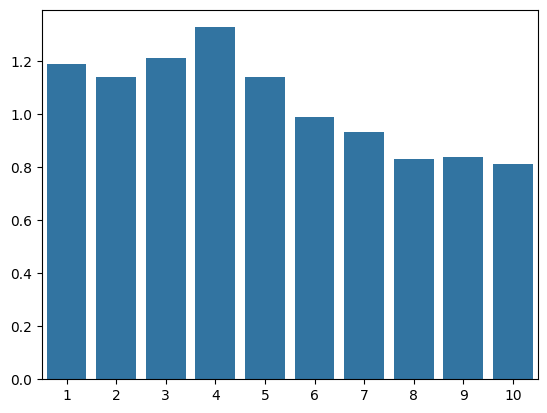

In [62]:
rmses = []

for i in range(1,11):
    kmean = KMeans(n_clusters=i, n_init=10).fit(rating_matrix)
    clusters = kmean.predict(rating_matrix)
    rmse_kmean = rmse(clusters)
    print(f'{i}, rmse: {rmse_kmean}')
    rmses.append(rmse_kmean)

sb.barplot(y=rmses, x=[i for i in range(1,11)])

#### Algorithm
Another hyper parameter worth looking into is algorithm. While elkan has a lower root mean square error, it is important to keep in minde that it has a slower performance compared to lloyd. However this dataset is small enough that elkan works well for this task.

In [63]:
rmses = []
algs = ['lloyd', 'elkan']

for a in algs:
    kmean = KMeans(n_clusters=5, n_init=10, algorithm=a).fit(rating_matrix)
    clusters = kmean.predict(rating_matrix)
    rmse_kmean = rmse(clusters)
    print(f'{a}, rmse: {rmse_kmean}')
    rmses.append(rmse_kmean)

lloyd, rmse: 1.2115704145921848
elkan, rmse: 0.8557461420439804


#### n_init
Lastley I am going to look at n_init. n_init determines how many different starting seeds the model tries. Since the inital centroids are chosen at random, it can be benificial to try a few different starting positions. The random factor also leads to more random results. Five seems like a good value to stick with however.

elkan, rmse: 0.7207037717000646
elkan, rmse: 0.8431473484624995
elkan, rmse: 0.9118911751415665
elkan, rmse: 0.6858845445638952
elkan, rmse: 0.9431675858466253
elkan, rmse: 1.0499654272496097
elkan, rmse: 1.1875110445490908
elkan, rmse: 0.9466960872351731
elkan, rmse: 0.9223137551478342
elkan, rmse: 1.123783775459024


<Axes: >

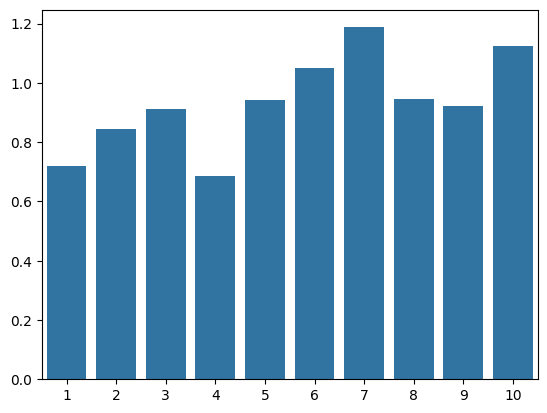

In [64]:
rmses = []

for i in range(1,11):
    kmean = KMeans(n_clusters=5, n_init=i, algorithm='elkan').fit(rating_matrix)
    clusters = kmean.predict(rating_matrix)
    rmse_kmean = rmse(clusters)
    print(f'{a}, rmse: {rmse_kmean}')
    rmses.append(rmse_kmean)

sb.barplot(y=rmses, x=[i for i in range(1,11)])

#### Final Model
For the final model I set n_clusters=5, algorithm=elkan, and n_init=5. This leads to a rmse of: 0.9055

In [82]:
kmean_final = KMeans(n_clusters=5, n_init=i, algorithm='elkan').fit(rating_matrix)
clusters_final = kmean_final.predict(rating_matrix)
rmse_kmean_final = rmse(clusters_final)

print('final rmse: ', rmse_kmean_final)

final rmse:  0.9055088701221059


### Predictions
Now we can use our model to predict how a user would rate a certain book.

In [66]:
user_id = users_train['User_ID'].iloc[0]
book_id = temp_list_final['Book_ID'].iloc[12]

pred = predict_rating(user_id,book_id,clusters_final)
print('predicted rating: ', pred)

user_id = users_train['User_ID'].iloc[20]
book_id = temp_list_final['Book_ID'].iloc[3]

pred = predict_rating(user_id,book_id,clusters_final)
print('predicted rating: ', pred)

predicted rating:  1.7011494252873562
predicted rating:  2.6690647482014387


## BisectingKMeans
For my second model I went with Bisecting KMeans Clustering. Unlike KMeans, Bisecting KMeans uses hierarchical clustering when picking centroids to base clusters off of. It is more efficiant than KMeans which is good when you have a large dataset. Looking at the base model's performance, it has a lower RMSE than the KMeans model had.

In [67]:
bkm = BisectingKMeans().fit(rating_matrix)
bkm_pred = bkm.predict(rating_matrix)

In [68]:
rmse_kmean = rmse(bkm_pred)
print(rmse_kmean)

0.7929263654996819


In [69]:
user_id = users_train['User_ID'].iloc[0]
book_id = temp_list_final['Book_ID'].iloc[12]

pred = predict_rating(user_id,book_id,bkm_pred)
print('predicted rating: ', pred)

predicted rating:  1.7386363636363635


### Hyperparameter Optimization
In order to improve the models performance even further different hyperparameter can be adjusted.

#### N_Clusters
While the centroids are chosen in a hierarchical way, Bisecting KMeans still takes in a set number of clusters.

1, rmse: 1.188375813699861
2, rmse: 1.1412926136688277
3, rmse: 0.9081516638844099
4, rmse: 0.29713331895065315
5, rmse: 0.5101703554925955
6, rmse: 0.8579099261817896
7, rmse: 0.8105792550824457
8, rmse: 0.7541428425826124
9, rmse: 0.9847879085789225
10, rmse: 0.8875356560558059


<Axes: >

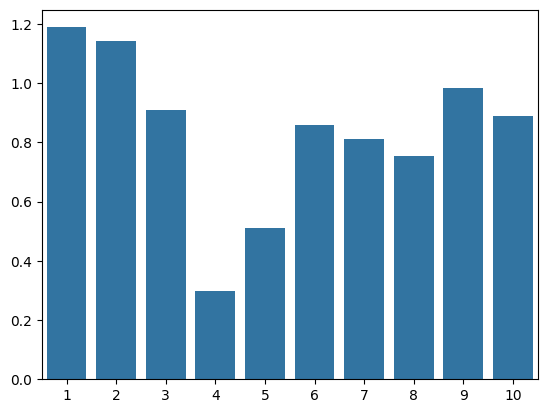

In [70]:
rmses = []

for i in range(1,11):
    bkm = BisectingKMeans(n_clusters=i).fit(rating_matrix)
    bkm_pred = bkm.predict(rating_matrix)
    rmse_bkm = rmse(bkm_pred)
    print(f'{i}, rmse: {rmse_bkm}')
    rmses.append(rmse_bkm)

sb.barplot(y=rmses, x=[i for i in range(1,11)])

#### Algorithm

In [71]:
rmses = []
algs = ['lloyd', 'elkan']

for a in algs:
    bkm = BisectingKMeans(n_clusters=5, algorithm=a).fit(rating_matrix)
    bkm_pred = bkm.predict(rating_matrix)
    rmse_bkm = rmse(bkm_pred)
    print(f'{a}, rmse: {rmse_bkm}')
    rmses.append(rmse_bkm)

lloyd, rmse: 0.6435454119046842
elkan, rmse: 0.7920302677775531


#### n_init

1, rmse: 0.6754349432286428
2, rmse: 0.7973599245107248
3, rmse: 1.3153399354077018
4, rmse: 1.0747201163586486
5, rmse: 1.1573216914414801
6, rmse: 1.1289005193358732
7, rmse: 1.0780664951802006
8, rmse: 1.1934110201373194
9, rmse: 1.0550291352244567
10, rmse: 1.0799691422550954


<Axes: >

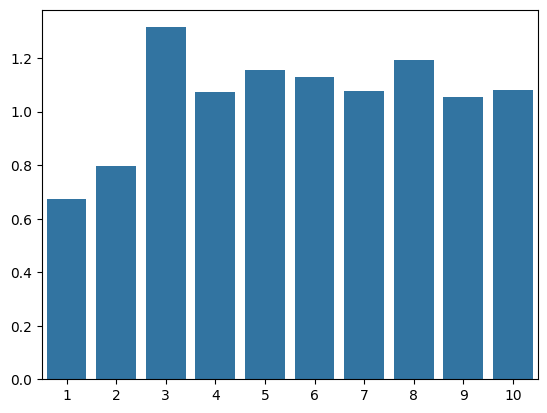

In [72]:
rmses = []

for i in range(1,11):
    bkm = BisectingKMeans(n_clusters=5, algorithm='elkan', n_init=i).fit(rating_matrix)
    bkm_pred = bkm.predict(rating_matrix)
    rmse_bkm = rmse(bkm_pred)
    print(f'{i}, rmse: {rmse_bkm}')
    rmses.append(rmse_bkm)

sb.barplot(y=rmses, x=[i for i in range(1,11)])

#### bisecting_strategy
Bisecting strategy determines how bisections should be performed when selecting centroids.

In [73]:
rmses = []
strategy = ['biggest_inertia', 'largest_cluster']

for s in strategy:
    bkm = BisectingKMeans(n_clusters=5, algorithm='elkan', bisecting_strategy=s).fit(rating_matrix)
    bkm_pred = bkm.predict(rating_matrix)
    rmse_bkm = rmse(bkm_pred)
    print(f'{s}, rmse: {rmse_bkm}')
    rmses.append(rmse_bkm)

biggest_inertia, rmse: 0.614369052689589
largest_cluster, rmse: 0.766769629713252


### Final Model
For the final model I set n_clusters=5, algorithm=elkan, and bisecting_strategy=largest_cluster. This leads to a rmse of: 0.5446.

In [80]:
bkm_final = BisectingKMeans(n_clusters=5, algorithm='elkan', bisecting_strategy='largest_cluster').fit(rating_matrix)
bkm_pred_final = bkm_final.predict(rating_matrix)

In [81]:
rmse_kmean = rmse(bkm_pred_final)
print(rmse_kmean)

0.5445858527038401


In [76]:
user_id = users_train['User_ID'].iloc[0]
book_id = temp_list_final['Book_ID'].iloc[12]

pred = predict_rating(user_id,book_id,bkm_pred_final)
print('predicted rating: ', pred)

predicted rating:  1.7058823529411764


## Conclusion
The Book Recommender data needed extensive cleaning. Because of this, it was hard to use most of the features in the books dataframe. Therefore unsupervised learning was the best approach to predicting book ratings. Since recommender systems often use collaborative or content based recommendations, clustering models made the most sense since both of those methods involve grouping similar data together. 

### Results
Looking at the results BisectingKMeans was definitely the better model. It's starting RMSE was already quite low compared to KMeans starting RMSE. After optimizing the hyperparameters I was able to bring BisectingKMeans's rmse down to 0.5446.

### What could be improved
In the future I could try replacing missing rating values with users's average ratings. This would produce a more accurate result because the models cannot tell between a low rating and a missing rating, so zero values can skew the data. I would aldo try to do more Principle Component Analysis next time. That would help determine which book are more informative to examine.
